## Importing dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_table("Final_Annotation.txt" , sep='\t' ,header =None)

df = df.reindex(np.random.permutation(df.index))

df.reset_index(inplace=True, drop=True)

df.head()


,0,1
0,0.0,@alisadoc1 @RyanMarino Kind of evil if you ask...
1,0.0,@tara_vijayan @VanAllenLab @DrAnneCarpenter @z...
2,0.0,Viral Mutations Medtalks with Dr KK Chat with ...
3,1.0,11) “That is a sharp shift from just a few wee...
4,1.0,Vaccination is our way to defeat Delta. That's...


In [3]:
df.columns=["label", "tweet_message"]
df

,label,tweet_message
0,0.0,@alisadoc1 @RyanMarino Kind of evil if you ask...
1,0.0,@tara_vijayan @VanAllenLab @DrAnneCarpenter @z...
2,0.0,Viral Mutations Medtalks with Dr KK Chat with ...
3,1.0,11) “That is a sharp shift from just a few wee...
4,1.0,Vaccination is our way to defeat Delta. That's...
...,...,...
1931,1.0,25) sure looks like we are headed to 3rd shot ...
1932,1.0,#COVID19 testing in #Ontario 🧪🔬🦠 - PHO % posi...
1933,1.0,Covishield is causing formation of blood clots...
1934,0.0,"होली की शुभकामनाएँ। Stay safe, stay happy 🙏🏻 h..."


In [4]:
df.dropna(subset = ["label"], inplace=True)

In [5]:
df

,label,tweet_message
0,0.0,@alisadoc1 @RyanMarino Kind of evil if you ask...
1,0.0,@tara_vijayan @VanAllenLab @DrAnneCarpenter @z...
2,0.0,Viral Mutations Medtalks with Dr KK Chat with ...
3,1.0,11) “That is a sharp shift from just a few wee...
4,1.0,Vaccination is our way to defeat Delta. That's...
...,...,...
1931,1.0,25) sure looks like we are headed to 3rd shot ...
1932,1.0,#COVID19 testing in #Ontario 🧪🔬🦠 - PHO % posi...
1933,1.0,Covishield is causing formation of blood clots...
1934,0.0,"होली की शुभकामनाएँ। Stay safe, stay happy 🙏🏻 h..."


In [6]:
df['label'] = df['label'].astype(str)
df['tweet_message'] = df['tweet_message'].astype(str)


In [7]:
df['label']=df['label'].replace('0.0', 0)
df['label']=df['label'].replace('1.0', 1)

In [8]:
df

,label,tweet_message
0,0,@alisadoc1 @RyanMarino Kind of evil if you ask...
1,0,@tara_vijayan @VanAllenLab @DrAnneCarpenter @z...
2,0,Viral Mutations Medtalks with Dr KK Chat with ...
3,1,11) “That is a sharp shift from just a few wee...
4,1,Vaccination is our way to defeat Delta. That's...
...,...,...
1931,1,25) sure looks like we are headed to 3rd shot ...
1932,1,#COVID19 testing in #Ontario 🧪🔬🦠 - PHO % posi...
1933,1,Covishield is causing formation of blood clots...
1934,0,"होली की शुभकामनाएँ। Stay safe, stay happy 🙏🏻 h..."


In [9]:
df

,label,tweet_message
0,0,@alisadoc1 @RyanMarino Kind of evil if you ask...
1,0,@tara_vijayan @VanAllenLab @DrAnneCarpenter @z...
2,0,Viral Mutations Medtalks with Dr KK Chat with ...
3,1,11) “That is a sharp shift from just a few wee...
4,1,Vaccination is our way to defeat Delta. That's...
...,...,...
1931,1,25) sure looks like we are headed to 3rd shot ...
1932,1,#COVID19 testing in #Ontario 🧪🔬🦠 - PHO % posi...
1933,1,Covishield is causing formation of blood clots...
1934,0,"होली की शुभकामनाएँ। Stay safe, stay happy 🙏🏻 h..."


## Visualising dataset

(-0.5, 799.5, 599.5, -0.5)

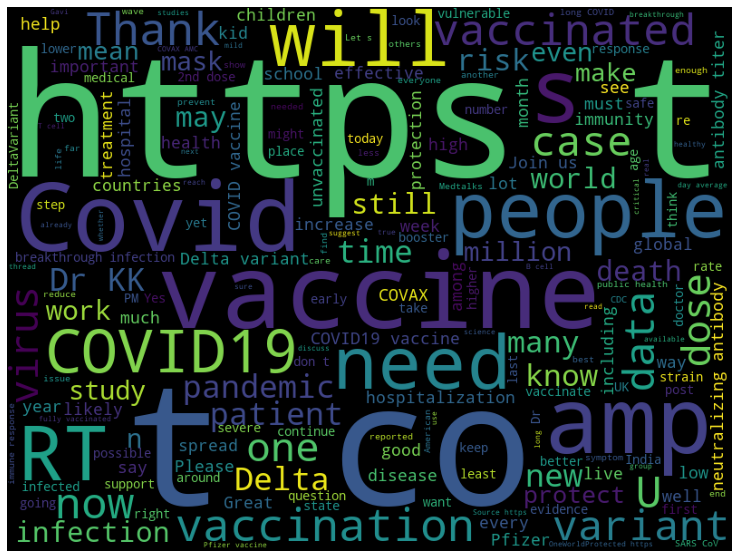

In [10]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(df['tweet_message'])) 
plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(ngram_range=(1, 1), lowercase = True , stop_words =  'english')

## Splitting dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train_tweet, X_test_tweet, y_train, y_test = train_test_split(df['tweet_message'], 
                                                    df['label'], 
                                                    random_state=42)
# the split ratio is 25% by default
# Here df['sms_message'] is X and df['label'] is y for both test and training data
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train_tweet.shape[0]))
print('Number of rows in the test set: {}'.format(X_test_tweet.shape[0]))

Number of rows in the total set: 1889
Number of rows in the training set: 1416
Number of rows in the test set: 473


In [13]:
df.shape

(1889, 2)

In [14]:
X_train_tweet

1211    @ENirenberg Probably not but that's okay. ASV ...
891                       @tejindersethi4 Yes, definitely
1129    Amplifying !! GET VACCINATED. https://t.co/DEC...
1032    Celiac disease is a very common digestive diso...
319     Ontario: Daily new #COVID19 cases, deaths, res...
                              ...                        
1153    16) another debate is that early vaccinations ...
1325        @ZaleskiLuke We don't claim him as one of us.
882     39/ The innate immune response also primes ada...
1492    85/   Circles: two weeks after 2nd dose of Pfi...
1149    7) here was 2 weeks ago… VE was 64% for preven...
Name: tweet_message, Length: 1416, dtype: object

In [15]:
y_train

1211    0
891     0
1129    1
1032    0
319     1
       ..
1153    1
1325    0
882     0
1492    1
1149    1
Name: label, Length: 1416, dtype: int64

## Data vectorization BoW

In [16]:
X_train = count_vector.fit_transform(X_train_tweet)

In [17]:
X_test = count_vector.transform(X_test_tweet)

In [18]:
X_train[0:5]

<5x6558 sparse matrix of type '<class 'numpy.int64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [19]:
X_test[0:5]

<5x6558 sparse matrix of type '<class 'numpy.int64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [20]:
X_train_feature_list = count_vector.get_feature_names()
X_train_feature_list


['00',
 '000',
 '005',
 '01assvlvgk',
 '02',
 '03',
 '03fhxrq7dn',
 '04',
 '05',
 '06',
 '06glq5dxrt',
 '06hdkqesas',
 '08',
 '08kmeelset',
 '0aa1xppwpi',
 '0rqq05dwxq',
 '0sby23boyc',
 '0wf8vuehco',
 '0wsiwr6fpz',
 '0zia2ek5zq',
 '0zjx5vplyr',
 '10',
 '100',
 '1000x',
 '100m',
 '100x',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10x',
 '11',
 '110',
 '110m',
 '111',
 '112',
 '113',
 '114',
 '115',
 '11567',
 '116',
 '117',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '12433',
 '125',
 '126',
 '127',
 '128',
 '129',
 '12x5507irk',
 '13',
 '131',
 '132',
 '133',
 '1334',
 '134',
 '135',
 '1354',
 '1355',
 '13586',
 '136',
 '1363',
 '137',
 '138',
 '139',
 '13x',
 '14',
 '140',
 '1407',
 '141',
 '142',
 '143',
 '1443',
 '145',
 '146',
 '147',
 '148',
 '149',
 '14d',
 '15',
 '150',
 '151',
 '152',
 '155',
 '156',
 '158',
 '159',
 '15th',
 '16',
 '160',
 '163',
 '166',
 '1677',
 '168',
 '169',
 '16th',
 '16xzjitugm',
 '17',
 '170',
 '176',
 '1760s',
 '1769'

In [21]:
doc_array =  X_train.toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
frequency_matrix_X_train = pd.DataFrame((doc_array),columns = X_train_feature_list)
frequency_matrix_X_train

,00,000,005,01assvlvgk,02,03,03fhxrq7dn,04,05,06,...,रक,रत,रन,रमण,रह,लग,लत,शन,समय,हम
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train , y_train)

MultinomialNB()

In [24]:
predictions = naive_bayes.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7272727272727273
Precision score:  0.8836206896551724
Recall score:  0.6677524429967426
F1 score:  0.7606679035250463


In [35]:
from sklearn.metrics import classification_report


In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68       241
           1       0.67      0.88      0.76       232

    accuracy                           0.73       473
   macro avg       0.75      0.73      0.72       473
weighted avg       0.75      0.73      0.72       473



## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logitic_regression = LogisticRegression(random_state=42)
logitic_regression.fit(X_train , y_train)

LogisticRegression(random_state=42)

In [32]:
predictions_logistic_regression = logitic_regression.predict(X_test)
predictions_logistic_regression

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions_logistic_regression,y_test)))
print('Precision score: ', format(precision_score(predictions_logistic_regression,y_test)))
print('Recall score: ', format(recall_score(predictions_logistic_regression,y_test)))
print('F1 score: ', format(f1_score(predictions_logistic_regression,y_test)))

Accuracy score:  0.7568710359408034
Precision score:  0.6767241379310345
Recall score:  0.7969543147208121
F1 score:  0.7319347319347319


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_logistic_regression))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       241
           1       0.80      0.68      0.73       232

    accuracy                           0.76       473
   macro avg       0.76      0.76      0.75       473
weighted avg       0.76      0.76      0.76       473



## MLP Classifier

In [38]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[700   0]
 [  0 716]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       716

    accuracy                           1.00      1416
   macro avg       1.00      1.00      1.00      1416
weighted avg       1.00      1.00      1.00      1416



In [40]:
predict_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predict_test,y_test)))
print('Precision score: ', format(precision_score(predict_test,y_test)))
print('Recall score: ', format(recall_score(predict_test,y_test)))
print('F1 score: ', format(f1_score(predict_test,y_test)))

Accuracy score:  0.7505285412262156
Precision score:  0.7155172413793104
Recall score:  0.7614678899082569
F1 score:  0.7377777777777778


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       241
           1       0.76      0.72      0.74       232

    accuracy                           0.75       473
   macro avg       0.75      0.75      0.75       473
weighted avg       0.75      0.75      0.75       473



## SGD Classifier

In [43]:
from sklearn.linear_model import SGDClassifier
model_3 = SGDClassifier(loss='modified_huber', random_state=0, shuffle=True)
model_3.fit(X_train , y_train)

SGDClassifier(loss='modified_huber', random_state=0)

In [44]:
predictions = model_3.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7568710359408034
Precision score:  0.6982758620689655
Recall score:  0.782608695652174
F1 score:  0.7380410022779044


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       241
           1       0.78      0.70      0.74       232

    accuracy                           0.76       473
   macro avg       0.76      0.76      0.76       473
weighted avg       0.76      0.76      0.76       473



## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier()
model_4.fit(X_train , y_train)

RandomForestClassifier()

In [48]:
predictions = model_4.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7674418604651163
Precision score:  0.7198275862068966
Recall score:  0.7877358490566038
F1 score:  0.7522522522522523


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       241
           1       0.79      0.72      0.75       232

    accuracy                           0.77       473
   macro avg       0.77      0.77      0.77       473
weighted avg       0.77      0.77      0.77       473



## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
model_5 = GradientBoostingClassifier()
model_5.fit(X_train , y_train)

GradientBoostingClassifier()

In [52]:
predictions = model_5.predict(X_test)
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7526427061310782
Precision score:  0.646551724137931
Recall score:  0.8108108108108109
F1 score:  0.7194244604316546


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       241
           1       0.81      0.65      0.72       232

    accuracy                           0.75       473
   macro avg       0.76      0.75      0.75       473
weighted avg       0.76      0.75      0.75       473



## KNN Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model_6 = KNeighborsClassifier(n_neighbors=7)
model_6.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
predictions = model_6.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.5708245243128964
Precision score:  0.13793103448275862
Recall score:  0.9142857142857143
F1 score:  0.2397003745318352


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.99      0.70       241
           1       0.91      0.14      0.24       232

    accuracy                           0.57       473
   macro avg       0.73      0.56      0.47       473
weighted avg       0.73      0.57      0.47       473



## SVM Classifier


In [59]:
from sklearn.svm import LinearSVC
model_7 = LinearSVC()
model_7.fit(X_train , y_train)

LinearSVC()

In [60]:
predictions = model_7.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7463002114164905
Precision score:  0.6810344827586207
Recall score:  0.7745098039215687
F1 score:  0.724770642201835


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       241
           1       0.77      0.68      0.72       232

    accuracy                           0.75       473
   macro avg       0.75      0.75      0.74       473
weighted avg       0.75      0.75      0.75       473

